In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
bsinfo = pd.read_csv("BSinfo.csv")
cldata = pd.read_csv("CLdata.csv")
ecdata = pd.read_csv("ECdata.csv")
to_predict = pd.read_csv("to_predict.csv")

In [ ]:
bsinfo

,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,B_0,Cell0,Type1,Mode2,365.000,20,4,6.875934
1,B_1,Cell0,Type2,Mode2,532.000,20,4,6.875934
2,B_2,Cell0,Type1,Mode2,365.000,20,4,6.875934
3,B_3,Cell0,Type2,Mode2,532.000,20,4,6.875934
4,B_4,Cell0,Type2,Mode2,532.000,20,4,6.875934
...,...,...,...,...,...,...,...,...
1212,B_925,Cell1,Type8,Mode1,697.002,10,4,7.877728
1213,B_105,Cell2,Type1,Mode2,426.980,2,2,6.877429
1214,B_745,Cell2,Type1,Mode2,426.980,2,2,6.877429
1215,B_105,Cell3,Type1,Mode2,426.980,2,2,6.877429


In [ ]:
cldata

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0,0,0.0,0.0
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0,0,0.0,0.0
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0,0,0.0,0.0
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0,0,0.0,0.0


In [ ]:
ecdata


,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812
...,...,...,...
92624,1/2/2023 17:00,B_1018,14.648729
92625,1/2/2023 18:00,B_1018,14.648729
92626,1/2/2023 21:00,B_1018,13.452915
92627,1/2/2023 22:00,B_1018,13.602392


In [ ]:
merged_data = pd.merge(cldata, ecdata, on=['Time', 'BS'])

In [ ]:
merged_data

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Energy
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.000000,64.275037
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.000000,55.904335
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.000000,57.698057
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.000000,55.156951
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.000000,56.053812
...,...,...,...,...,...,...,...,...,...,...,...
98079,1/2/2023 17:00,B_1018,Cell0,0.087538,0.0,0.0,0.0,0,0.0,0.781566,14.648729
98080,1/2/2023 18:00,B_1018,Cell0,0.082635,0.0,0.0,0.0,0,0.0,0.804310,14.648729
98081,1/2/2023 21:00,B_1018,Cell0,0.055538,0.0,0.0,0.0,0,0.0,0.846935,13.452915
98082,1/2/2023 22:00,B_1018,Cell0,0.058077,0.0,0.0,0.0,0,0.0,0.856434,13.602392


In [ ]:
merged_data['Time'] = pd.to_datetime(merged_data['Time'])

In [ ]:

merged_data

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Energy
0,2023-01-01 01:00:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.000000,64.275037
1,2023-01-01 02:00:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.000000,55.904335
2,2023-01-01 03:00:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.000000,57.698057
3,2023-01-01 04:00:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.000000,55.156951
4,2023-01-01 05:00:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.000000,56.053812
...,...,...,...,...,...,...,...,...,...,...,...
98079,2023-01-02 17:00:00,B_1018,Cell0,0.087538,0.0,0.0,0.0,0,0.0,0.781566,14.648729
98080,2023-01-02 18:00:00,B_1018,Cell0,0.082635,0.0,0.0,0.0,0,0.0,0.804310,14.648729
98081,2023-01-02 21:00:00,B_1018,Cell0,0.055538,0.0,0.0,0.0,0,0.0,0.846935,13.452915
98082,2023-01-02 22:00:00,B_1018,Cell0,0.058077,0.0,0.0,0.0,0,0.0,0.856434,13.602392


In [ ]:
merged_data["CellName"].unique()

array(['Cell0', 'Cell1', 'Cell2', 'Cell3'], dtype=object)

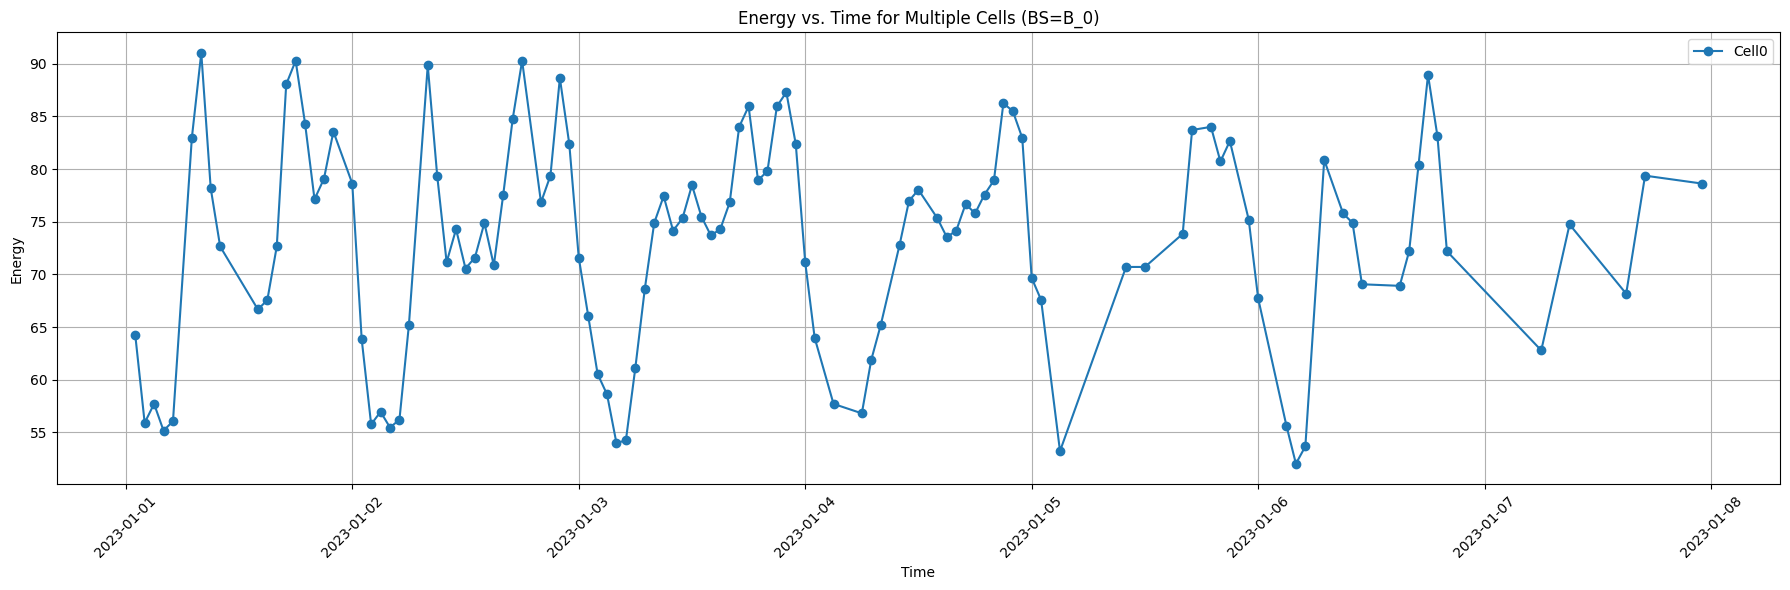

In [ ]:
selected_cells = ['Cell0', 'Cell1', 'Cell2', 'Cell3']

cell_data = merged_data[(merged_data['CellName'].isin(selected_cells)) & (merged_data['BS'] == 'B_0')]

# Create the multiline plot
plt.figure(figsize=(18, 6))

# Group the data by 'CellName' and plot each group
for cell, group_data in cell_data.groupby('CellName'):
    plt.plot(group_data['Time'], group_data['Energy'], marker='o', linestyle='-', label=cell)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title(f'Energy vs. Time for Multiple Cells (BS={"B_0"})')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

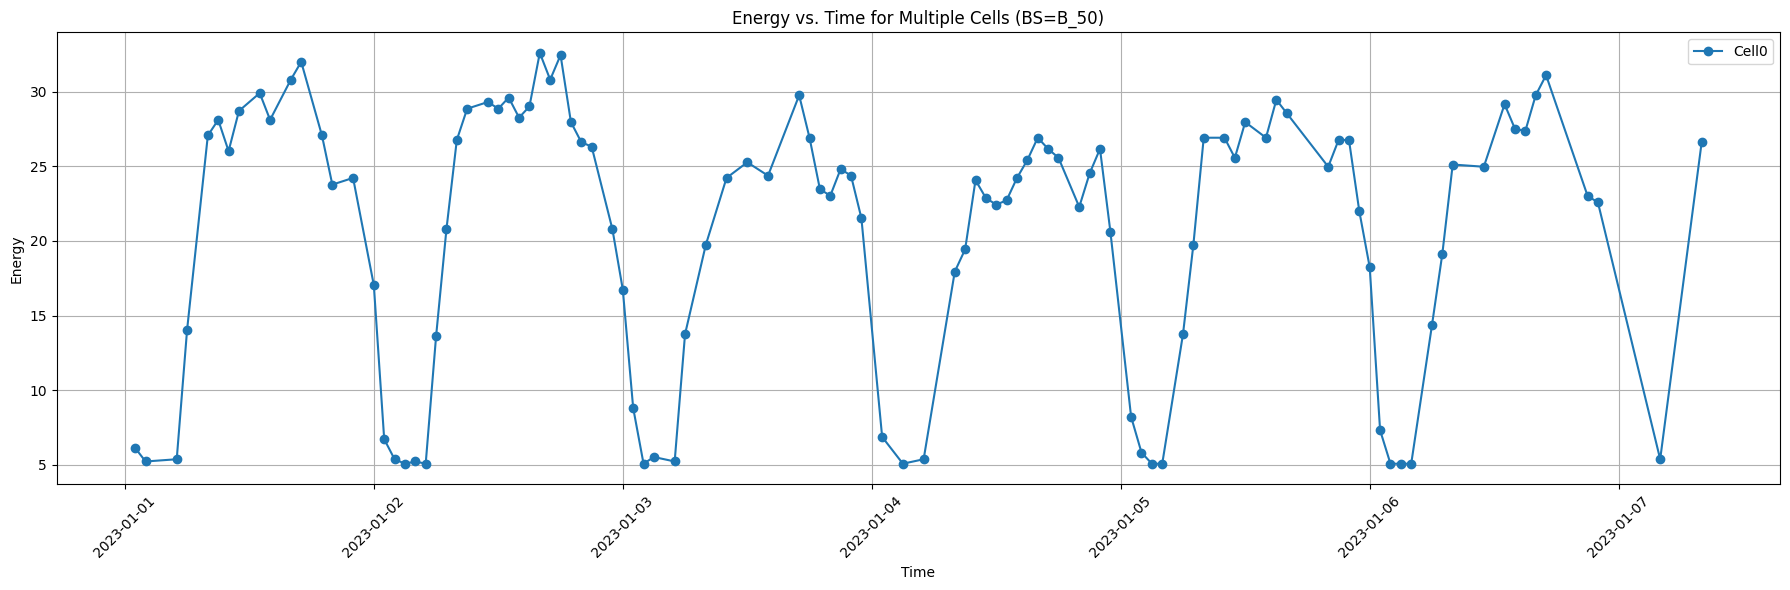

In [ ]:
selected_cells = ['Cell0', 'Cell1', 'Cell2', 'Cell3']

cell_data = merged_data[(merged_data['CellName'].isin(selected_cells)) & (merged_data['BS'] == 'B_50')]

# Create the multiline plot
plt.figure(figsize=(18, 6))

# Group the data by 'CellName' and plot each group
for cell, group_data in cell_data.groupby('CellName'):
    plt.plot(group_data['Time'], group_data['Energy'], marker='o', linestyle='-', label=cell)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title(f'Energy vs. Time for Multiple Cells (BS={"B_50"})')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

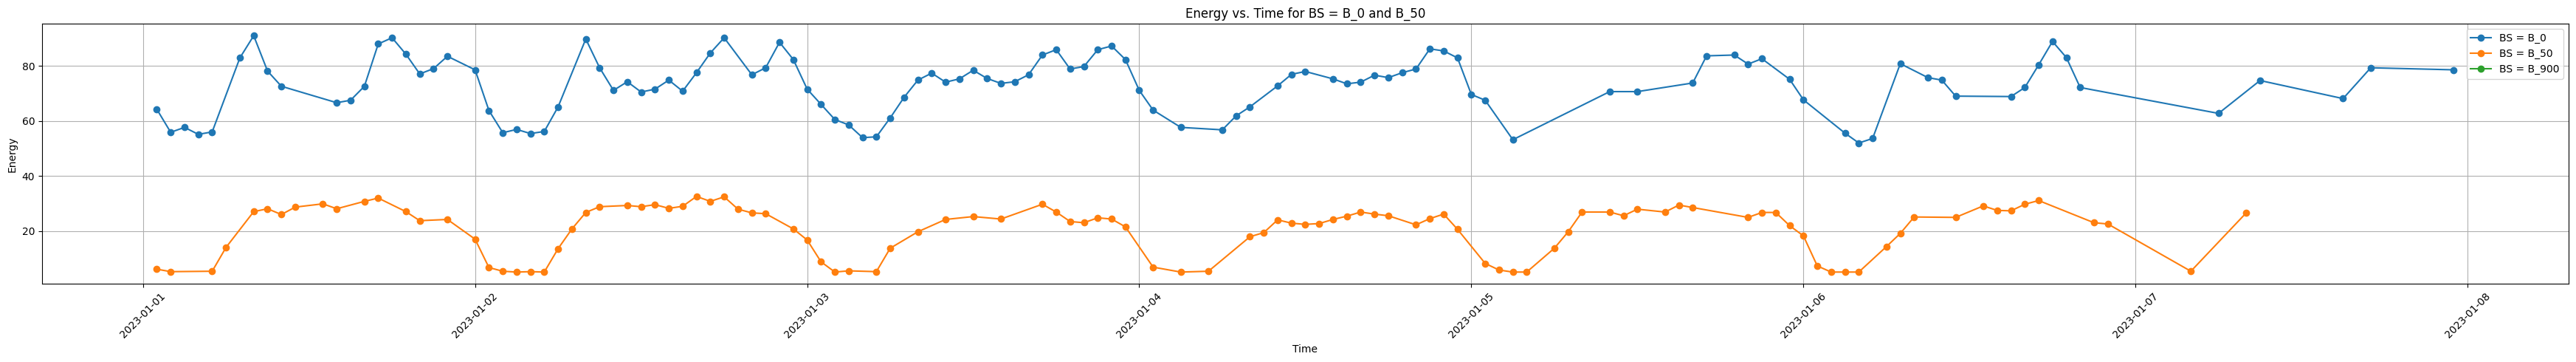

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with your dataset

# Filter the data for 'BS' values 'B_0' and 'B_50'
selected_bs_values = ['B_0', 'B_50','B_900']
filtered_data = merged_data[merged_data['BS'].isin(selected_bs_values)]

# Create a line plot for each 'BS' value
plt.figure(figsize=(35,5))  # Adjust the figure size as needed

for bs_value in selected_bs_values:
    bs_data = filtered_data[filtered_data['BS'] == bs_value]
    plt.plot(bs_data['Time'], bs_data['Energy'], marker='o', linestyle='-', label=f'BS = {bs_value}')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs. Time for BS = B_0 and B_50')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
merged_data1 = pd.merge(bsinfo, ecdata, on=['BS'])
merged_data1.to_csv('merged_data1.csv', index=False)

In [ ]:
merged_data1


,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Time,Energy
0,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 1:00,64.275037
1,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 2:00,55.904335
2,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 3:00,57.698057
3,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 4:00,55.156951
4,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 5:00,56.053812
...,...,...,...,...,...,...,...,...,...,...
114185,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 17:00,14.648729
114186,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 18:00,14.648729
114187,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 21:00,13.452915
114188,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 22:00,13.602392


In [ ]:
import pandas as pd

# Assuming your merged_data1 DataFrame is already loaded

# Define the number of bins
num_bins = 5
# Create frequency bins using pd.cut()
merged_data1['frequency_bin'] = pd.cut(merged_data1['Frequency'], bins=num_bins, labels=False)

# Show the updated DataFrame
merged_data1


,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Time,Energy,frequency_bin
0,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 1:00,64.275037,1
1,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 2:00,55.904335,1
2,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 3:00,57.698057,1
3,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 4:00,55.156951,1
4,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 5:00,56.053812,1
...,...,...,...,...,...,...,...,...,...,...,...
114185,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 17:00,14.648729,1
114186,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 18:00,14.648729,1
114187,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 21:00,13.452915,1
114188,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 22:00,13.602392,1


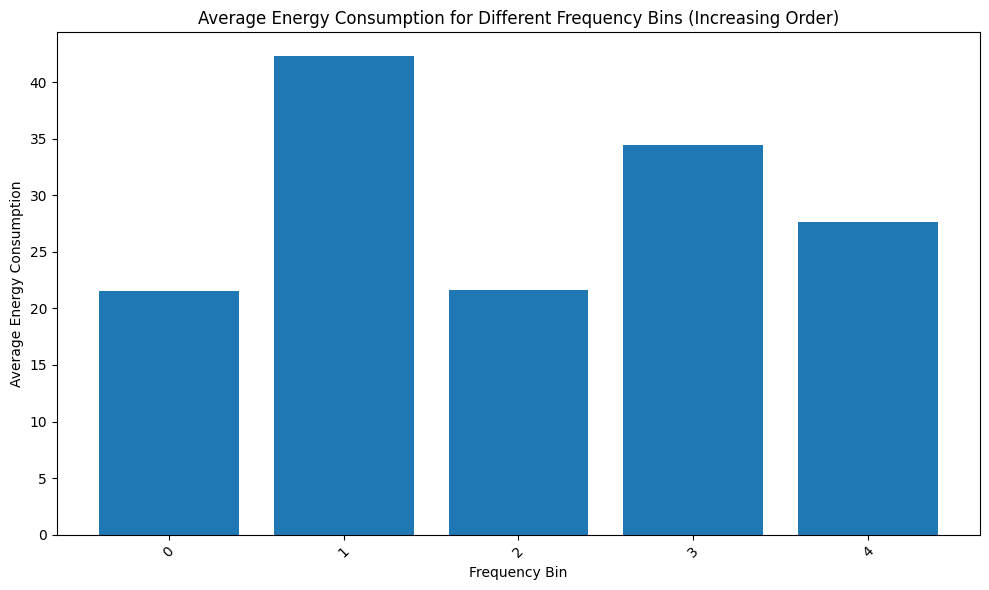

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data1 DataFrame is already loaded and frequency_bin is added

# Group data by 'frequency_bin' and calculate the average energy consumption
frequency_bin_avg_energy = merged_data1.groupby('frequency_bin')['Energy'].mean()

# Convert the result back to a DataFrame and sort by frequency_bin
frequency_bin_avg_energy_df = frequency_bin_avg_energy.reset_index().sort_values(by='frequency_bin')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(frequency_bin_avg_energy_df['frequency_bin'], frequency_bin_avg_energy_df['Energy'])
plt.xlabel('Frequency Bin')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption for Different Frequency Bins (Increasing Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


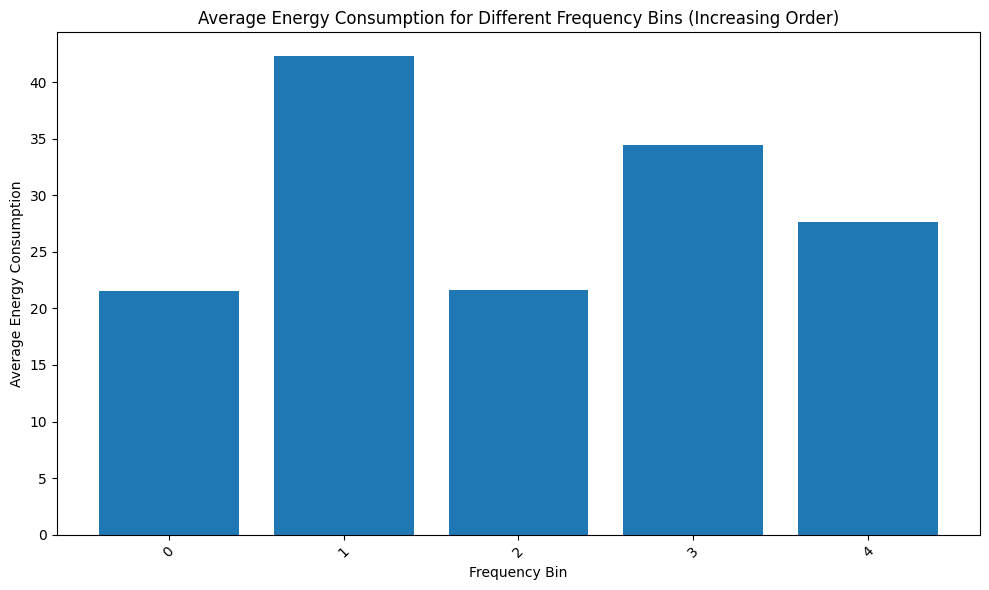

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data1 DataFrame is already loaded and frequency_bin is added

# Group data by 'frequency_bin' and calculate the average energy consumption
frequency_bin_avg_energy = merged_data1.groupby('frequency_bin')['Energy'].mean()

# Convert the result back to a DataFrame and sort by frequency_bin
frequency_bin_avg_energy_df = frequency_bin_avg_energy.reset_index().sort_values(by='frequency_bin')

# Remove rows with missing average energy values
frequency_bin_avg_energy_df = frequency_bin_avg_energy_df.dropna(subset=['Energy'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(frequency_bin_avg_energy_df['frequency_bin'], frequency_bin_avg_energy_df['Energy'])
plt.xlabel('Frequency Bin')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption for Different Frequency Bins (Increasing Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


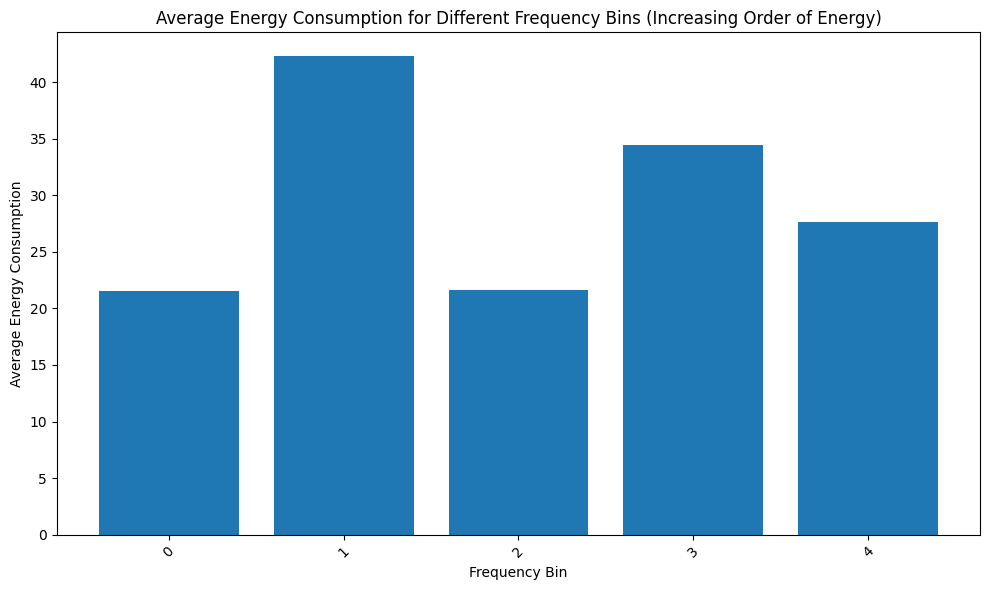

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data1 DataFrame is already loaded and frequency_bin is added

# Group data by 'frequency_bin' and calculate the average energy consumption
frequency_bin_avg_energy = merged_data1.groupby('frequency_bin')['Energy'].mean()

# Convert the result back to a DataFrame
frequency_bin_avg_energy_df = frequency_bin_avg_energy.reset_index()

# Remove rows with missing average energy values
frequency_bin_avg_energy_df = frequency_bin_avg_energy_df.dropna(subset=['Energy'])

# Sort DataFrame by average energy values in increasing order
frequency_bin_avg_energy_df.sort_values(by='Energy', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(frequency_bin_avg_energy_df['frequency_bin'], frequency_bin_avg_energy_df['Energy'])
plt.xlabel('Frequency Bin')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption for Different Frequency Bins (Increasing Order of Energy)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   frequency_bin     Energy
0              0  21.518800
2              2  21.651500
4              4  27.653214
3              3  34.470409
1              1  42.311350


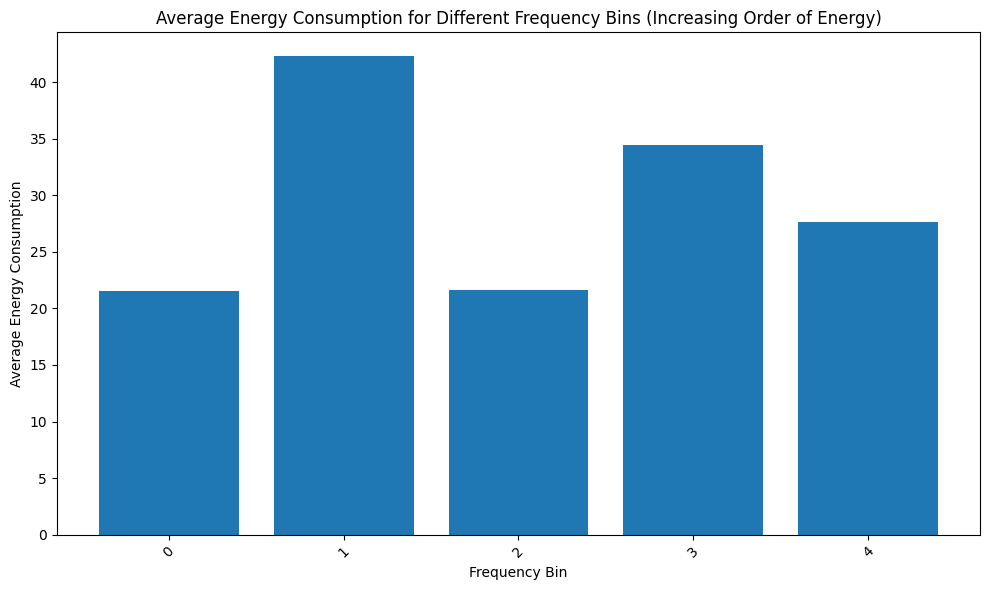

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data1 DataFrame is already loaded and frequency_bin is added

# Group data by 'frequency_bin' and calculate the average energy consumption
frequency_bin_avg_energy = merged_data1.groupby('frequency_bin')['Energy'].mean()

# Convert the result to a DataFrame
frequency_bin_avg_energy_df = frequency_bin_avg_energy.reset_index()

# Remove rows with missing average energy values
frequency_bin_avg_energy_df = frequency_bin_avg_energy_df.dropna(subset=['Energy'])

# Sort DataFrame by average energy values in increasing order
frequency_bin_avg_energy_df.sort_values(by='Energy', inplace=True)

# Print average energy values for each frequency bin in a table
print(frequency_bin_avg_energy_df)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(frequency_bin_avg_energy_df['frequency_bin'], frequency_bin_avg_energy_df['Energy'])
plt.xlabel('Frequency Bin')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption for Different Frequency Bins (Increasing Order of Energy)')
plt.xticks(frequency_bin_avg_energy_df['frequency_bin'], rotation=45)
plt.tight_layout()
plt.show()


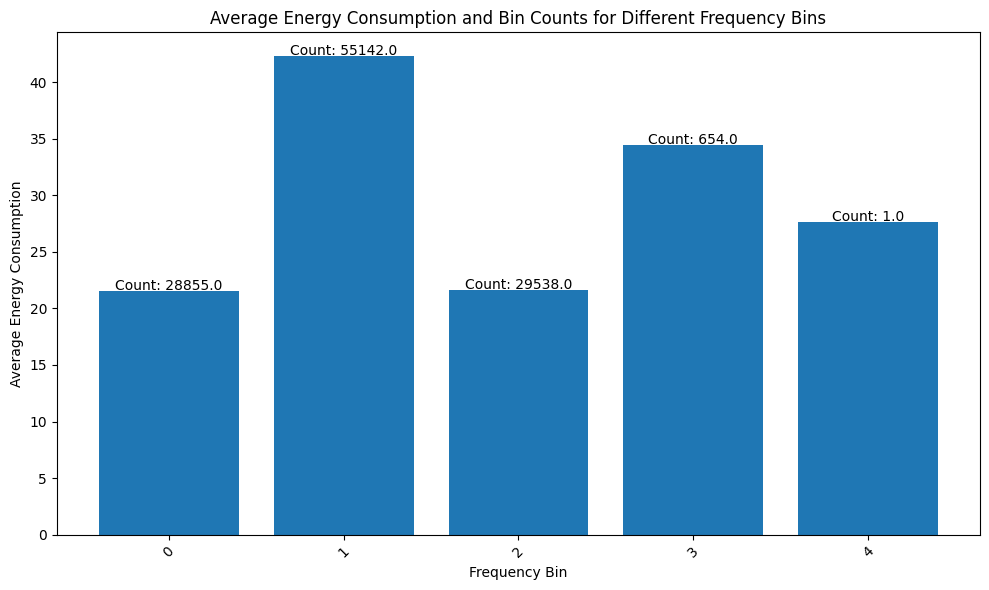

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data1 DataFrame is already loaded and frequency_bin is added

# Group data by 'frequency_bin' and calculate the average energy consumption and bin counts
frequency_bin_grouped = merged_data1.groupby('frequency_bin').agg({'Energy': 'mean', 'frequency_bin': 'size'})

# Rename columns for clarity
frequency_bin_grouped.rename(columns={'Energy': 'Average Energy', 'frequency_bin': 'Bin Count'}, inplace=True)

# Sort by frequency_bin
frequency_bin_grouped.sort_values(by='frequency_bin', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(frequency_bin_grouped.index, frequency_bin_grouped['Average Energy'])
plt.xlabel('Frequency Bin')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption and Bin Counts for Different Frequency Bins')
plt.xticks(rotation=45)

# Display bin counts on the plot
for index, row in frequency_bin_grouped.iterrows():
    plt.text(index, row['Average Energy'] + 0.1, f'Count: {row["Bin Count"]}', ha='center')

plt.tight_layout()
plt.show()



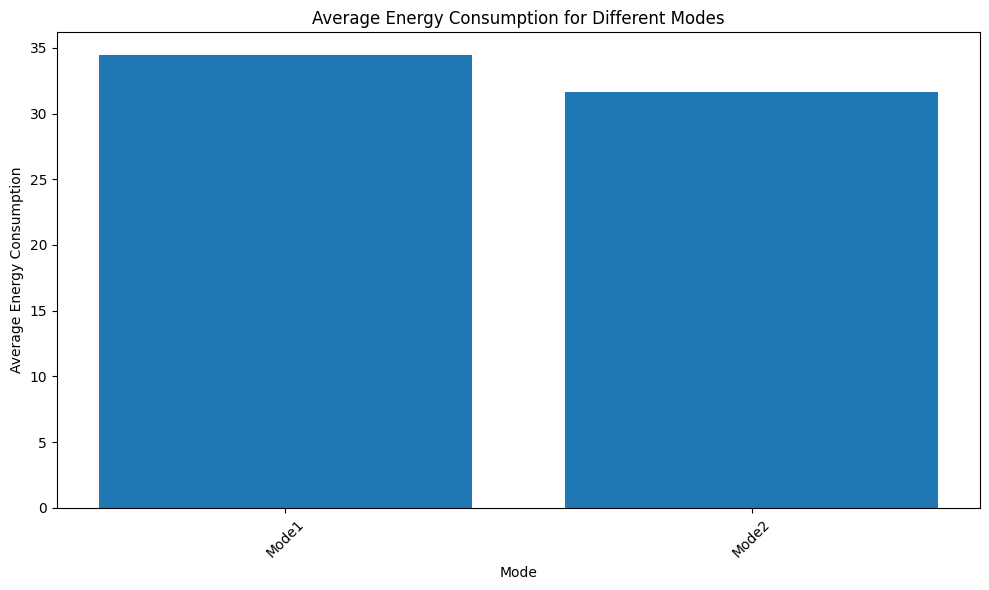

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data1 DataFrame is already loaded

# Group data by 'Mode' and calculate the average energy consumption
mode_avg_energy = merged_data1.groupby('Mode')['Energy'].mean()

# Convert the result back to a DataFrame
mode_avg_energy_df = mode_avg_energy.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(mode_avg_energy_df['Mode'], mode_avg_energy_df['Energy'])
plt.xlabel('Mode')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption for Different Modes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



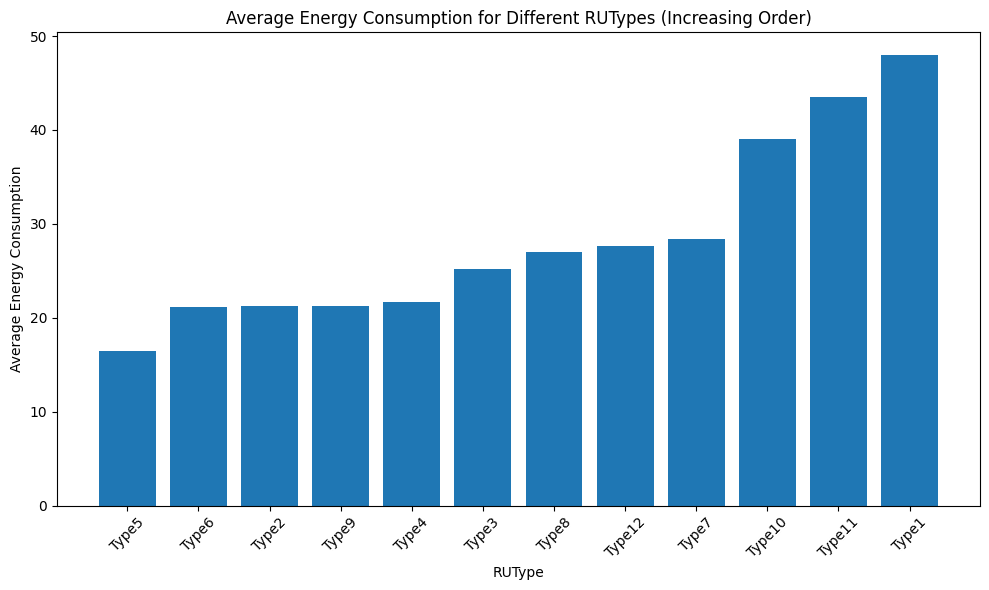

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data1 DataFrame is already loaded

# Group data by 'RUType' and calculate the average energy consumption
rptype_avg_energy = merged_data1.groupby('RUType')['Energy'].mean()

# Convert the result back to a DataFrame and sort by average energy consumption
rptype_avg_energy_df = rptype_avg_energy.reset_index().sort_values(by='Energy')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(rptype_avg_energy_df['RUType'], rptype_avg_energy_df['Energy'])
plt.xlabel('RUType')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption for Different RUTypes (Increasing Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data1 DataFrame is already loaded

# Group data by 'RUType' and calculate the average energy consumption
rptype_avg_energy = merged_data1.groupby('RUType')['Energy'].mean()

# Convert the result back to a DataFrame
rptype_avg_energy_df = rptype_avg_energy.reset_index()

# Sort DataFrame by average energy consumption in increasing order
rptype_avg_energy_df.sort_values(by='Energy', inplace=True)

# Create a dictionary to map 'RUType' to numerical bins (from 1 to 12)
ru_type_mapping = {ru_type: bin_num for ru_type, bin_num in zip(rptype_avg_energy_df['RUType'], range(12, 0, -1))}

# Apply the mapping to create a new column 'RUType_Bin'
merged_data1['RUType_Bin'] = merged_data1['RUType'].map(ru_type_mapping)

merged_data1

,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Time,Energy,frequency_bin,RUType_Bin
0,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 1:00,64.275037,1,1
1,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 2:00,55.904335,1,1
2,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 3:00,57.698057,1,1
3,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 4:00,55.156951,1,1
4,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 5:00,56.053812,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
114185,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 17:00,14.648729,1,12
114186,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 18:00,14.648729,1,12
114187,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 21:00,13.452915,1,12
114188,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 22:00,13.602392,1,12


In [ ]:
import pandas as pd

# Assuming you have the merged_data1 DataFrame with the columns 'RUType_Bin'

# Create a mapping to swap the values in 'RUType_Bin'
swap_mapping = {1: 12, 2: 11, 3: 10, 4: 9, 5: 8, 6: 7, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

# Apply the mapping to the 'RUType_Bin' column
merged_data1['RUType_Bin'] = merged_data1['RUType_Bin'].map(swap_mapping)

# Display the updated DataFrame
merged_data1


,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Time,Energy,frequency_bin,RUType_Bin
0,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 1:00,64.275037,1,12
1,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 2:00,55.904335,1,12
2,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 3:00,57.698057,1,12
3,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 4:00,55.156951,1,12
4,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 5:00,56.053812,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
114185,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 17:00,14.648729,1,1
114186,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 18:00,14.648729,1,1
114187,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 21:00,13.452915,1,1
114188,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 22:00,13.602392,1,1


In [ ]:
import pandas as pd

# Assuming you have the merged_data1 DataFrame with the columns 'Bandwidth' and 'Antennas'

# Create a new feature 'Bandwidth_Antennas' by multiplying 'Bandwidth' and 'Antennas'
merged_data1['Bandwidth_Antennas'] = merged_data1['Bandwidth'] * merged_data1['Antennas']

# Display the updated DataFrame
merged_data1


,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Time,Energy,frequency_bin,RUType_Bin,Bandwidth_Antennas
0,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 1:00,64.275037,1,12,80
1,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 2:00,55.904335,1,12,80
2,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 3:00,57.698057,1,12,80
3,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 4:00,55.156951,1,12,80
4,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 5:00,56.053812,1,12,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114185,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 17:00,14.648729,1,1,4
114186,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 18:00,14.648729,1,1,4
114187,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 21:00,13.452915,1,1,4
114188,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 22:00,13.602392,1,1,4


In [ ]:
import pandas as pd

# Assuming you have the merged_data1 DataFrame with the required columns

# Create new features by multiplying columns together
merged_data1['Freq_Bin_RUType_Bin'] = merged_data1['frequency_bin'] * merged_data1['RUType_Bin']

merged_data1['Freq_Bin_Bandwidth'] = merged_data1['frequency_bin'] * merged_data1['Bandwidth']

merged_data1['Freq_Bin_Antennas'] = merged_data1['frequency_bin'] * merged_data1['Antennas']

merged_data1['RUType_Bin_Bandwidth'] = merged_data1['Bandwidth'] * merged_data1['RUType_Bin']

merged_data1['RUType_Bin_Antennas'] = merged_data1['Antennas'] * merged_data1['RUType_Bin']

# Display the updated DataFrame
merged_data1

,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Time,Energy,frequency_bin,RUType_Bin,Bandwidth_Antennas,Freq_Bin_RUType_Bin,Freq_Bin_Bandwidth,Freq_Bin_Antennas,RUType_Bin_Bandwidth,RUType_Bin_Antennas
0,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 1:00,64.275037,1,12,80,12,20,4,240,48
1,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 2:00,55.904335,1,12,80,12,20,4,240,48
2,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 3:00,57.698057,1,12,80,12,20,4,240,48
3,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 4:00,55.156951,1,12,80,12,20,4,240,48
4,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 5:00,56.053812,1,12,80,12,20,4,240,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114185,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 17:00,14.648729,1,1,4,1,2,2,2,2
114186,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 18:00,14.648729,1,1,4,1,2,2,2,2
114187,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 21:00,13.452915,1,1,4,1,2,2,2,2
114188,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 22:00,13.602392,1,1,4,1,2,2,2,2


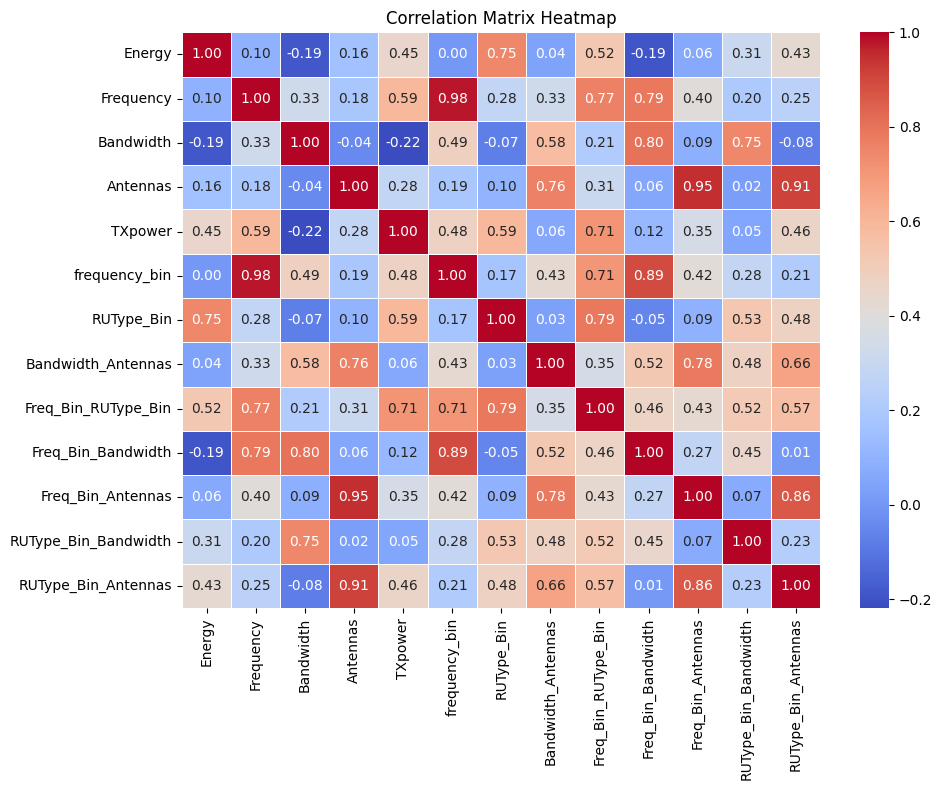

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the merged_data1 DataFrame with the specified features

# Select the desired features
selected_features = ['Energy', 'Frequency'	,'Bandwidth'	,'Antennas'	,'TXpower' , 'frequency_bin', 'RUType_Bin', 'Bandwidth_Antennas', 'Freq_Bin_RUType_Bin', 'Freq_Bin_Bandwidth', 'Freq_Bin_Antennas', 'RUType_Bin_Bandwidth', 'RUType_Bin_Antennas']

# Create a DataFrame with the selected features
selected_data = merged_data1[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set plot title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
ecdata

,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812
...,...,...,...
92624,1/2/2023 17:00,B_1018,14.648729
92625,1/2/2023 18:00,B_1018,14.648729
92626,1/2/2023 21:00,B_1018,13.452915
92627,1/2/2023 22:00,B_1018,13.602392


In [ ]:
merged_data1

,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Time,Energy,frequency_bin,RUType_Bin,Bandwidth_Antennas,Freq_Bin_RUType_Bin,Freq_Bin_Bandwidth,Freq_Bin_Antennas,RUType_Bin_Bandwidth,RUType_Bin_Antennas
0,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 1:00,64.275037,1,12,80,12,20,4,240,48
1,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 2:00,55.904335,1,12,80,12,20,4,240,48
2,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 3:00,57.698057,1,12,80,12,20,4,240,48
3,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 4:00,55.156951,1,12,80,12,20,4,240,48
4,B_0,Cell0,Type1,Mode2,365.00,20,4,6.875934,1/1/2023 5:00,56.053812,1,12,80,12,20,4,240,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114185,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 17:00,14.648729,1,1,4,1,2,2,2,2
114186,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 18:00,14.648729,1,1,4,1,2,2,2,2
114187,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 21:00,13.452915,1,1,4,1,2,2,2,2
114188,B_1018,Cell0,Type5,Mode2,426.98,2,2,7.325859,1/2/2023 22:00,13.602392,1,1,4,1,2,2,2,2


In [ ]:
import pandas as pd

# Assuming you have the ecdata and merged_data1 DataFrames

# Merge ecdata with merged_data1 to get the RUType_Bin column
ecdatap = ecdata.merge(merged_data1[['BS', 'Time', 'RUType_Bin', 'TXpower', 'frequency_bin']], on=['BS', 'Time'], how='left')

# Display the resulting DataFrame
ecdatap


,Time,BS,Energy,RUType_Bin,TXpower,frequency_bin
0,1/1/2023 1:00,B_0,64.275037,12,6.875934,1
1,1/1/2023 1:00,B_0,64.275037,12,7.327504,1
2,1/1/2023 2:00,B_0,55.904335,12,6.875934,1
3,1/1/2023 2:00,B_0,55.904335,12,7.327504,1
4,1/1/2023 3:00,B_0,57.698057,12,6.875934,1
...,...,...,...,...,...,...
114185,1/2/2023 17:00,B_1018,14.648729,1,7.325859,1
114186,1/2/2023 18:00,B_1018,14.648729,1,7.325859,1
114187,1/2/2023 21:00,B_1018,13.452915,1,7.325859,1
114188,1/2/2023 22:00,B_1018,13.602392,1,7.325859,1


In [ ]:
ecdata

,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812
...,...,...,...
92624,1/2/2023 17:00,B_1018,14.648729
92625,1/2/2023 18:00,B_1018,14.648729
92626,1/2/2023 21:00,B_1018,13.452915
92627,1/2/2023 22:00,B_1018,13.602392


In [ ]:
import pandas as pd

# Assuming you have the ecdata and ecdatap DataFrames

# Create a copy of the ecdata DataFrame
ecdata1 = ecdata.copy()

# Add the required columns from ecdatap to ecdata1
columns_to_add = ['RUType_Bin', 'TXpower', 'frequency_bin']
ecdata1[columns_to_add] = ecdatap[columns_to_add]

# Display the resulting DataFrame ecdata1
ecdata1


,Time,BS,Energy,RUType_Bin,TXpower,frequency_bin
0,1/1/2023 1:00,B_0,64.275037,12,6.875934,1
1,1/1/2023 2:00,B_0,55.904335,12,7.327504,1
2,1/1/2023 3:00,B_0,57.698057,12,6.875934,1
3,1/1/2023 4:00,B_0,55.156951,12,7.327504,1
4,1/1/2023 5:00,B_0,56.053812,12,6.875934,1
...,...,...,...,...,...,...
92624,1/2/2023 17:00,B_1018,14.648729,5,6.875934,2
92625,1/2/2023 18:00,B_1018,14.648729,5,6.875934,2
92626,1/2/2023 21:00,B_1018,13.452915,5,6.875934,2
92627,1/2/2023 22:00,B_1018,13.602392,5,6.875934,2


In [ ]:
ecdata1['Time'] = pd.to_datetime(ecdata1['Time'])
ecdata1

,Time,BS,Energy,RUType_Bin,TXpower,frequency_bin
0,2023-01-01 01:00:00,B_0,64.275037,12,6.875934,1
1,2023-01-01 02:00:00,B_0,55.904335,12,7.327504,1
2,2023-01-01 03:00:00,B_0,57.698057,12,6.875934,1
3,2023-01-01 04:00:00,B_0,55.156951,12,7.327504,1
4,2023-01-01 05:00:00,B_0,56.053812,12,6.875934,1
...,...,...,...,...,...,...
92624,2023-01-02 17:00:00,B_1018,14.648729,5,6.875934,2
92625,2023-01-02 18:00:00,B_1018,14.648729,5,6.875934,2
92626,2023-01-02 21:00:00,B_1018,13.452915,5,6.875934,2
92627,2023-01-02 22:00:00,B_1018,13.602392,5,6.875934,2


In [ ]:
to_predict

,Time,BS,Energy,w
0,2023-01-01 06:00:00,B_0,NaN,1
1,2023-01-01 11:00:00,B_0,NaN,1
2,2023-01-01 12:00:00,B_0,NaN,1
3,2023-01-01 13:00:00,B_0,NaN,1
4,2023-01-01 23:00:00,B_0,NaN,1
...,...,...,...,...
26134,2023-01-02 19:00:00,B_1019,NaN,5
26135,2023-01-02 20:00:00,B_1019,NaN,5
26136,2023-01-02 21:00:00,B_1019,NaN,5
26137,2023-01-02 22:00:00,B_1019,NaN,5


In [ ]:
import pandas as pd

# Assuming you have the to_predict DataFrame
to_predict = to_predict.drop(['w'], axis=1)

# Display the resulting DataFrame
to_predict


,Time,BS,Energy
0,2023-01-01 06:00:00,B_0,NaN
1,2023-01-01 11:00:00,B_0,NaN
2,2023-01-01 12:00:00,B_0,NaN
3,2023-01-01 13:00:00,B_0,NaN
4,2023-01-01 23:00:00,B_0,NaN
...,...,...,...
26134,2023-01-02 19:00:00,B_1019,NaN
26135,2023-01-02 20:00:00,B_1019,NaN
26136,2023-01-02 21:00:00,B_1019,NaN
26137,2023-01-02 22:00:00,B_1019,NaN


In [ ]:
to_predict

,Time,BS,Energy
0,2023-01-01 06:00:00,B_0,NaN
1,2023-01-01 11:00:00,B_0,NaN
2,2023-01-01 12:00:00,B_0,NaN
3,2023-01-01 13:00:00,B_0,NaN
4,2023-01-01 23:00:00,B_0,NaN
...,...,...,...
26134,2023-01-02 19:00:00,B_1019,NaN
26135,2023-01-02 20:00:00,B_1019,NaN
26136,2023-01-02 21:00:00,B_1019,NaN
26137,2023-01-02 22:00:00,B_1019,NaN


In [ ]:
ecdata1


,Time,BS,Energy,RUType_Bin,TXpower,frequency_bin
0,2023-01-01 01:00:00,B_0,64.275037,12,6.875934,1
1,2023-01-01 02:00:00,B_0,55.904335,12,7.327504,1
2,2023-01-01 03:00:00,B_0,57.698057,12,6.875934,1
3,2023-01-01 04:00:00,B_0,55.156951,12,7.327504,1
4,2023-01-01 05:00:00,B_0,56.053812,12,6.875934,1
...,...,...,...,...,...,...
92624,2023-01-02 17:00:00,B_1018,14.648729,5,6.875934,2
92625,2023-01-02 18:00:00,B_1018,14.648729,5,6.875934,2
92626,2023-01-02 21:00:00,B_1018,13.452915,5,6.875934,2
92627,2023-01-02 22:00:00,B_1018,13.602392,5,6.875934,2


In [ ]:
import pandas as pd
from scipy.stats import mode

# Assuming you have the ecdata1 and to_predict DataFrames

# Create a dictionary to map BS values to their corresponding RUType_Bin values
bs_to_rutype = ecdata1.groupby('BS')['RUType_Bin'].apply(lambda x: mode(x)[0][0]).to_dict()

# Add 'RUType_Bin' column to to_predict using the mapping
to_predict['RUType_Bin'] = to_predict['BS'].map(bs_to_rutype)

# Display the updated to_predict DataFrame
to_predict


IndexError: ignored

In [ ]:
import pandas as pd
from scipy.stats import mode

# Assuming you have the ecdata1 and to_predict DataFrames

# Create dictionaries to map BS values to their corresponding 'TXpower' and 'frequency_bin' values
bs_to_txpower = ecdata1.groupby('BS')['TXpower'].apply(lambda x: mode(x)[0][0]).to_dict()
bs_to_frequency_bin = ecdata1.groupby('BS')['frequency_bin'].apply(lambda x: mode(x)[0][0]).to_dict()

# Add 'TXpower' and 'frequency_bin' columns to to_predict using the mappings
to_predict['TXpower'] = to_predict['BS'].map(bs_to_txpower)
to_predict['frequency_bin'] = to_predict['BS'].map(bs_to_frequency_bin)

# Display the updated to_predict DataFrame
to_predict

In [ ]:
to_predict.describe()

In [ ]:
from sklearn.impute import SimpleImputer

# Create a copy of the to_predict DataFrame to work with
to_predict_filled = to_predict.copy()

# Define the columns to impute
columns_to_impute = ['RUType_Bin', 'TXpower', 'frequency_bin']

# Define imputation strategies for each column
imputation_strategies = ['most_frequent', 'mean', 'most_frequent']

# Initialize SimpleImputer with the specified strategies
imputer = SimpleImputer(strategy='most_frequent')

# Loop through columns and apply imputation
for col, strategy in zip(columns_to_impute, imputation_strategies):
    imputer.strategy = strategy
    to_predict_filled[col] = imputer.fit_transform(to_predict_filled[[col]])

# Display the filled DataFrame
to_predict_filled


In [ ]:
ecdata1


In [ ]:
combined_dataset = pd.concat([ecdata1, to_predict_filled], axis=0, ignore_index=True)


In [ ]:
combined_dataset = combined_dataset.sort_values(by=["BS", "Time"])

combined_dataset

In [ ]:
combined_dataset['Time'] = pd.to_datetime(combined_dataset['Time'])

In [ ]:
# Assuming your combined_dataset DataFrame is already created
combined_dataset.to_csv('combined_dataset.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Load your combined_dataset DataFrame
# combined_dataset = ...

# Prepare features and target variable
features = ['RUType_Bin', 'TXpower', 'frequency_bin', 'Time', 'BS']
target = 'Energy'

# Filter NaN values for training
training_data = combined_dataset.dropna(subset=[target])
X_features = training_data[features]
X_time_series = training_data[features].loc[:, 'Time'].values
X_time_series = (X_time_series - X_time_series.min()) / np.timedelta64(1, 'h')  # Normalize time
X_time_series = X_time_series.reshape(-1, 1)
X = np.concatenate((X_features, X_time_series), axis=1)
y = training_data[target].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
input_features = Input(shape=(X_train.shape[1],))
time_series_input = Input(shape=(1,))
merged_inputs = concatenate([input_features, time_series_input], axis=1)
x = LSTM(units=50, activation='relu')(merged_inputs)
output = Dense(units=1)(x)

model = Model(inputs=[input_features, time_series_input], outputs=output)
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit([X_train[:, :-1], X_train[:, -1]], y_train, epochs=50, batch_size=32, validation_data=([X_test[:, :-1], X_test[:, -1]], y_test))

# Fill NaN values in combined_dataset using the trained RNN model
to_predict = combined_dataset[combined_dataset[target].isnull()][features]
to_predict_features = to_predict.drop(target, axis=1).values
to_predict_time_series = to_predict['Time'].values
to_predict_time_series = (to_predict_time_series - X_time_series.min()) / np.timedelta64(1, 'h')  # Normalize time
to_predict_time_series = to_predict_time_series.reshape(-1, 1)
to_predict_features = scaler.transform(to_predict_features)
to_predict = np.concatenate((to_predict_features, to_predict_time_series), axis=1)
predicted_energies = model.predict([to_predict[:, :-1], to_predict[:, -1]])
combined_dataset.loc[combined_dataset[target].isnull(), target] = predicted_energies

# Print the filled combined_dataset
combined_dataset



In [ ]:
import pandas as pd

# Assuming you have the ecdatap and to_predict DataFrames

# Select the columns to be added from ecdatap
columns_to_add = ['RUType_Bin', 'TXpower', 'frequency_bin']

# Iterate through each row in ecdatap and add values to to_predict based on matching BS
for index, row in ecdatap.iterrows():
    bs_value = row['BS']
    matching_row = to_predict[to_predict['BS'] == bs_value]
    if not matching_row.empty:
        for col in columns_to_add:
            to_predict.loc[matching_row.index, col] = row[col]

# Display the updated to_predict DataFrame
to_predict


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load your dataset
dataset = pd.read_csv("merged_data1.csv")

# Initialize a LabelEncoder for each categorical column
label_encoders = {}
categorical_columns = ['BS', 'CellName', 'RUType', 'Mode']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

# Convert the 'Time' column to a numeric format
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset['Year'] = dataset['Time'].dt.year
dataset['Month'] = dataset['Time'].dt.month
dataset['Day'] = dataset['Time'].dt.day
dataset['Hour'] = dataset['Time'].dt.hour
dataset['Minute'] = dataset['Time'].dt.minute
dataset['Second'] = dataset['Time'].dt.second

# Drop the original 'Time' column
dataset = dataset.drop(columns=['Time'])

# Split your data into training and testing sets
X = dataset.drop(columns=['Energy'])
y = dataset['Energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (e.g., Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Now, you can use the trained model to predict energy values for rows with 'Energy' equal to zero.


In [ ]:
# Assuming you have already trained your model (model)

# Load the dataset with rows to predict (rows with 'Energy' equal to zero)
zero_energy_data = pd.read_csv('SampleSubmission.csv')  # Replace with your actual data file

# Split this dataset into features (X_zero_energy)
X_zero_energy = zero_energy_data.drop(columns=['ID', 'Energy'])

# Use the trained model to make predictions
predicted_energy = model.predict(X_zero_energy)

# Add the predicted energy values to the dataset
zero_energy_data['Predicted_Energy'] = predicted_energy

# Save the dataset with predictions to a CSV file
zero_energy_data.to_csv('predicted_energy_data.csv', index=False)


In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

In [ ]:
X_missing = test_data.drop(['Time', 'Energy'], axis=1)
predicted_energy = model.predict(X_missing)

In [ ]:
test_data.loc[:, 'Energy'] = predicted_energy

# Fill 'Energy' in the original dataset with predicted values
merged_data.update(test_data)

# Export the updated dataset with predicted energy values
merged_data.to_csv("predicted_energy_data.csv", index=False)